<a href="https://colab.research.google.com/github/joanats/LH_CD_JOANATS/blob/main/LH_CD_JOANATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎬 Desafio Indicium – Data-Driven Insights**

### Entendimento do problema

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma **análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido**. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

> Este notebook documenta o desenvolvimento e análise de modelos para o desafio proposto pela Indicium, utilizando técnicas de machine learning e análise de dados.

### Objetivo do desafio

O presente notebook tem como objetivo realizar uma análise data-driven de um banco de dados cinematográfico, de forma a identificar padrões, tendências e fatores de sucesso em produções anteriores.

A partir dessa análise, busca-se fornecer insights estratégicos que possam orientar a PProductions na definição de seu próximo projeto, reduzindo riscos e maximizando o potencial de retorno.

Além disso, o desafio também pede:

> Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas.

> Responda também às seguintes perguntas:
- Qual filme você recomendaria para uma pessoa que você não conhece?
- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
- Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

> Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

> Entre outras perguntas que responderei conforme o desenvolvimento do desafio.

### Dados obtidos

Para entender o processo, vamos utilizar a base de dados que foi disponibilizada no processo seletivo da Indicium.

As colunas desse dataset são:

- **Series_Title:** título do filme.  
- **Released_Year:** ano de lançamento.  
- **Certificate:** classificação indicativa (ex.: PG, R, etc.).  
- **Runtime:** duração do filme em minutos.  
- **Genre:** gênero do filme (ex.: Drama, Action, Comedy).  
- **IMDB_Rating:** nota média atribuída pelos usuários do IMD, numa escala de 0 a 10.  
- **Overview:** breve descrição ou sinopse do filme.  
- **Meta_score:** avaliação da crítica especializada (Metascore).  
- **Director:** diretor do filme.  
- **Star1, Star2, Star3, Star4:** principais atores/atrizes.  
- **No_of_Votes:** número de votos recebidos no IMDb.  
- **Gross:** bilheteria do filme (em dólares).  



### Configurações Iniciais

Baixando o arquivo do desafio - O arquivo está hospedado no Google Drive e é acessado via o ID compartilhado

In [3]:
!gdown 1JUTYnugqoG_Dek-yLedjbpIHY1iJh7Ex

Downloading...
From: https://drive.google.com/uc?id=1JUTYnugqoG_Dek-yLedjbpIHY1iJh7Ex
To: /content/desafio_indicium_imdb.csv
100% 303k/303k [00:00<00:00, 85.8MB/s]


## **Análise Exploratória de Dados (EDA)**


Agora que já entendemos o problema, podemos começar nossa EDA!

A etapa de EDA é o principal passo de um projeto de Ciência de Dados, para uma boa EDA é necessário seguir alguns passos composto pelas seis fases de perguntar, preparar, processar, analisar, compartilhar e agir.

Seu objetivo é obter insights que impulsionem a tomada de decisões informadas.

Importando as bibliotecas necessárias

In [4]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from nltk.corpus import stopwords
from collections import Counter
from xgboost import XGBRegressor
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import joblib
import base64
import random
import nltk
import os
import re

In [5]:
df = pd.read_csv("desafio_indicium_imdb.csv")


Para obter uma visão geral rápida do conjunto de dados e entender suas principais características, vamos carregar as **primeiras e últimas linhas do dataset**.

Essa abordagem nos permitirá explorar uma amostra representativa sem a necessidade de carregar todo o conjunto de dados, facilitando a análise inicial e identificando possíveis padrões ou problemas de qualidade dos dados.


In [6]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [7]:
df.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


Além disso, vamos analisar as informações gerais do nosso DataFrame utilizando o método `df.info()`.

Dessa forma, conseguimos visualizar a quantidade de linhas e colunas, os tipos de dados de cada variável, bem como a presença de valores nulos, o que será útil para definir os próximos passos de limpeza e tratamento.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Também verificamos os valores ausentes em cada coluna com `df.isnull().sum()`, para identificar quais variáveis precisarão de tratamento.

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


Com isso, podemos perceber que as colunas:


* Certificate
* Meta_score
* Gross

possuem valores nulos de 101, 157 e 169 respectivamente.


Utilizo o método `nunique()` para identificar a quantidade de valores distintos em cada coluna, o que auxilia na compreensão da diversidade dos dados.

Para isso, irei aplicá-lo apenas nas colunas categóricas — como `Released_Year, Certificate, Genre, Director e Star1 a Star4` — pois são variáveis em que faz sentido analisar a variedade.

Dessa forma, é possível observar, por exemplo, quantos anos diferentes estão representados na base, quantas classificações indicativas existem, a diversidade de gêneros, bem como a variedade de diretores e atores.

In [10]:
colunas_categorias = ["Released_Year", "Certificate", "Genre", "Director", "Star1", "Star2", "Star3", "Star4"]

df[colunas_categorias].nunique()


,0
Released_Year,100
Certificate,16
Genre,202
Director,548
Star1,659
Star2,840
Star3,890
Star4,938


O comando `base.describe()` irá gerar uma estatística descritiva das colunas numéricas da nossa base, isso ajuda a entender a distribuição dos dados, identificar possíveis outliers e avaliar a dispersão dos valores.

In [11]:
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


Com isso, podemos interpretar que:

- **IMDB_Rating:** os filmes possuem avaliações geralmente altas, com média de 7,95 e pouca variação (min 7,6, max 9,2).

- **Meta_score:** apresenta maior dispersão (média 77,97) e cerca de 16% dos registros estão ausentes.

- **No_of_Votes:** há grande desigualdade na quantidade de votos, com média de 271.621 e mediana de 138.356, indicando que alguns filmes com muitos votos puxam a média para cima (outliers).

Concluimos que, se uma coluna tem muitos valores únicos e não possui um padrão claro, pode não ser útil para o modelo. Porém, variáveis numéricas ou categóricas relevantes ainda podem ser transformadas para melhorar a performance do modelo.



### Visualizando de forma gráfica

Para ficar mais intuitivo e didático, vamos escolher por visualizar esses dados de forma gráfica, utilizando a biblioteca matplotlib, importada no começo do nosso projeto

Primeiro, vamos construir histogramas das colunas `IMDB_Rating, Meta_score e No_of_Votes`, pois são variáveis numéricas que permitem visualizar a distribuição dos dados.

Dessa forma, podemos identificar padrões, concentrações de valores e possíveis características que influenciam o comportamento dos filmes

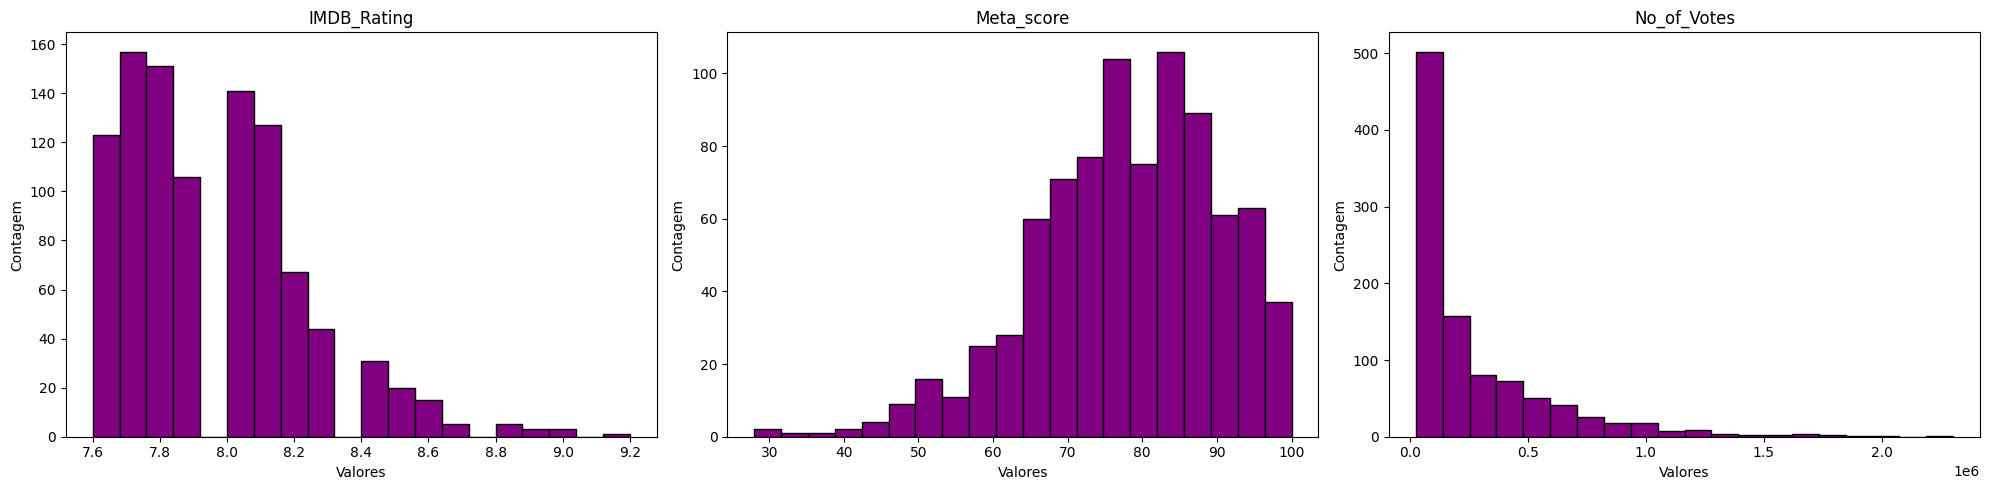

In [12]:
cols = ["IMDB_Rating", "Meta_score", "No_of_Votes"]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(cols):
  axes[i].hist(df[col].dropna(), bins=20, color="purple", edgecolor='black')
  axes[i].set_title(col)
  axes[i].set_xlabel("Valores")
  axes[i].set_ylabel("Contagem")


plt.tight_layout()
plt.show()

Feito isso, podemos concluir que:

- **IMDB_Rating:**
  - Distribuição levemente assimétrica à esquerda: a maioria dos filmes tem notas altas.

  - Pico: entre 7,8 e 8, indicando que a maioria dos filmes é bem avaliada.

  - Dispersão: varia de 7,6 a 9,2; poucos filmes com notas muito baixas ou muito altas.

- **Meta_score:**
  - Distribuição semelhante ao IMDB, também com maior concentração em pontuações altas.

  - Pico: 80–85, com muitos filmes acima de 80.

  - Dispersão: varia de 30 a 100, poucos filmes com Meta_score abaixo de 50.

- **No_of_Votes:**
  - Distribuição altamente assimétrica à direita: a maioria dos filmes tem poucos votos.

  - Pico: filmes com menor número de votos (~0–250.000).

  - Dispersão: alguns filmes com milhões de votos, formando uma cauda longa (outliers).

Como podemos observar nos histogramas, algumas colunas **apresentam valores que se destacam da maioria, indicando a possível presença de outliers**. Sendo assim, vamos verificar essas colunas com **boxplots**, que permitem identificar de forma clara os valores extremos e a dispersão dos dados.

Antes de criar os boxplots, devemos transformar as colunas `Gross` e `Runtime` para o tipo numérico (float), pois atualmente estão como texto (object).

Essa conversão permite que possamos analisar corretamente a dispersão dos dados e identificar outliers nessas colunas.

In [13]:
df["Gross"] = df["Gross"].str.replace(",", "").str.replace("$", "", regex=True).astype(float)
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(float)

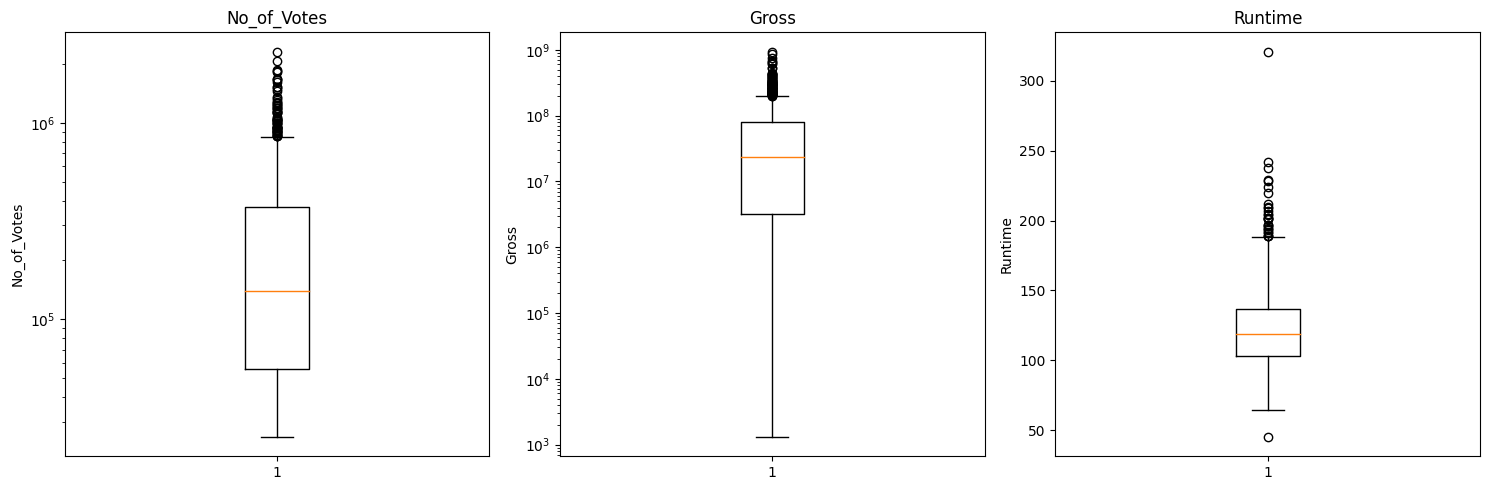

In [14]:
cols = ["No_of_Votes", "Gross", "Runtime"]


fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, col in enumerate(cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

    if col in ["Gross", "No_of_Votes"]:
        axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

- **No_of_Votes (Número de Votos):**

  - Escala logarítmica para lidar com a ampla gama de valores.

  - Mediana: ~100.000 votos; metade dos filmes tem menos, metade tem mais.

  - Dispersão: caixa grande indica alta variação entre os 25º e 75º percentis.

  - Outliers: filmes com milhões de votos, confirmando a longa cauda observada no histograma.

- **Gross (Bilheteria):**

  - Escala logarítmica.

  - Mediana: pouco acima de 100.000.

  - Dispersão: variação significativa entre os quartis, mostrando diferenças de faturamento.

  - Outliers: "blockbusters" com bilheteria muito maior que a maioria.

- **Runtime (Duração):**

  - Mediana: ~115 minutos.

  - Dispersão: 50% dos filmes entre 100 e 130 minutos.

  - Extremos: bigodes vão de ~65 a 180 minutos.

  - - Outliers: alguns filmes muito curtos (`<65 min`) e muito longos (~320 min).


Embora alguns valores em `No_of_Votes` e `Gross` sejam extremos, **eles representam filmes excepcionais, como blockbusters ou filmes com grande popularidade.** Para o contexto deste dataset, esses outliers são válidos e fornecem insights relevantes sobre filmes de grande destaque.

Para lidar com a ampla variação desses dados e tornar os outliers visualmente claros, **apliquei escala logarítmica nos boxplots**. Essa transformação não remove os valores extremos, mas permite observar melhor a dispersão dos dados e identificar padrões, sem distorcer a análise.

Portanto, optei por mantê-los para a EDA, garantindo uma visão fiel da distribuição dos dados.

### Cálculo dos Outliers

Para identificar outliers em cada coluna numérica, definimos **limites inferiores e superiores** usando o **Intervalo Interquartil (IQR)**.

A fórmula é:

- Limite inferior: `Q1 - 1.5 * IQR`  
- Limite superior: `Q3 + 1.5 * IQR`

Onde:  
- **Q1 (1º quartil):** separa os 25% menores da amostra  
- **Q3 (3º quartil):** separa os 25% maiores da amostra  
- **IQR:** diferença entre Q3 e Q1, representando a dispersão do meio dos dados  

Valores abaixo do limite inferior ou acima do limite superior são considerados **outliers**.


In [15]:
def print_outlier_info(series, nome_coluna):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count = ((series < lower) | (series > upper)).sum()

    print(f"Coluna: {nome_coluna}")
    print(f"IQR: {IQR:.2f}")
    print(f"Limite inferior: {lower:.2f}")
    print(f"Limite superior: {upper:.2f}")
    print(f"Total de outliers: {count}")
    print("-"*30)

cols = ["No_of_Votes", "Gross", "Runtime"]

for col in cols:
    print_outlier_info(df[col], col)


Coluna: No_of_Votes
IQR: 317696.00
Limite inferior: -421072.50
Limite superior: 849711.50
Total de outliers: 66
------------------------------
Coluna: Gross
IQR: 77631001.75
Limite inferior: -113201164.12
Limite superior: 197322842.88
Total de outliers: 88
------------------------------
Coluna: Runtime
IQR: 34.00
Limite inferior: 52.00
Limite superior: 188.00
Total de outliers: 29
------------------------------


**Análise de Outliers**

**No_of_Votes:** 66 filmes estão acima do limite superior (~850.000 votos), indicando filmes extremamente populares.

**Gross:** 88 filmes têm bilheteria acima do limite superior (~197 milhões), representando os blockbusters do dataset.

**Runtime:** 29 filmes têm duração fora do intervalo típico (52 a 188 minutos), incluindo filmes muito curtos ou longos.


**Observação:** Apesar de extremos, esses valores são válidos para o contexto do dataset. Para a EDA, mantemos os outliers, usando escala logarítmica em No_of_Votes e Gross para facilitar a visualização.

### Matriz de Correlação

Para os dados disponíveis, é válido gerar **uma matriz de correlação** para verificar como as colunas numéricas se relacionam entre si.

Isso nos ajuda a identificar padrões, entender quais variáveis podem influenciar outras e escolher melhor os fatores importantes para análises ou modelagem futura.

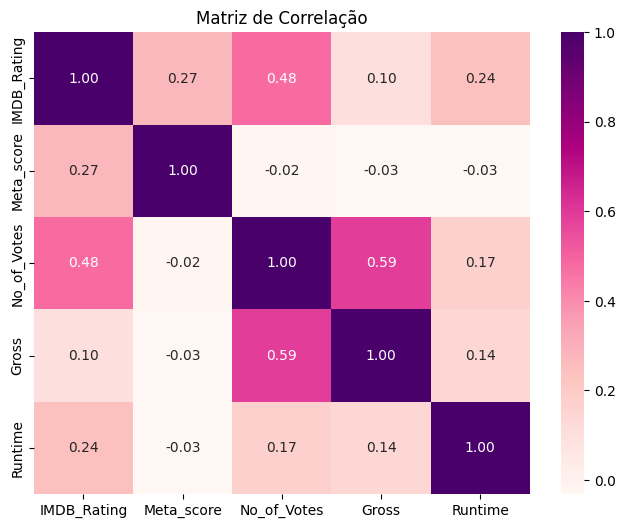

In [16]:
numeric_cols = ["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross", "Runtime"]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="RdPu", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


- **No_of_Votes e Gross (0.59):**

  Correlação positiva moderada a forte, filmes mais populares tendem a ter maior bilheteria.

- **IMDB_Rating e No_of_Votes (0.48):**

  Correlação positiva moderada, filmes com notas altas atraem mais votos.

- **IMDB_Rating e Gross (0.10) / Meta_score e No_of_Votes (-0.02) / Meta_score e Gross (-0.03):**

  Correlação muito fraca ou quase nula, notas do público ou da crítica não garantem sucesso financeiro.

- **Runtime e IMDB_Rating (0.24) / Runtime e Gross (0.14):**

  Correlação fraca, duração do filme não é um bom preditor de sucesso ou qualidade.



Com isso, concluimos que:

A popularidade `(número de votos/No_of_Votes)` **é o melhor indicador de bilheteria,** enquanto avaliações do público ou crítica e duração do filme têm pouca relação com sucesso financeiro.

## **Manipulação de Dados**

**Tratando Valores Nulos**

Agora que já **entendemos os dados**, é hora de **começar a manipulação** para prepará-los para uma análise mais profunda.

Nesta etapa, vamos realizar ações como **limpar dados ausentes ou inconsistentes, transformar variáveis, filtrar informações relevantes e ajustar o formato das colunas conforme necessário.**

In [17]:
df.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


- **Coluna Released_Year (Ano de lançamento):**

A coluna `Released_Year` (Ano de lançamento) tem apenas 1 valor nulo, logo, como o impacto sobre o dataset é minimo, optei por remover essa linha.

In [18]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [19]:
df = df.dropna(subset=['Released_Year'])

- **Coluna Certificate (Classificação):**

Para a coluna `Certificate` (Classificação) decidi tratar esses valores nulos preenchendo-os como `Desconhecido`, indicando assim que não há informação de classificação indicativa.

Essa abordagem mantém todos os filmes no dataset e **evita colocar uma classificação incorreta**, o que poderia levar a interpretações erradas, como assumir que um filme é adequado para crianças quando na verdade é para maiores.


In [20]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [21]:
df['Certificate'] = df['Certificate'].fillna('Desconhecido')

- **Coluna Meta_score (avaliação dos críticos especializados):**

A coluna `Meta_score` possui alguns valores ausentes (NaN). Para não perder registros e permitir análises, preenchi esses valores com a **mediana**, que é menos sensível a outliers e representa melhor a maioria dos filmes.

In [22]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

- **Coluna Gross (faturamento do filme):**

A coluna Gross possui 169 valores ausentes (NaN). Como essa variável apresenta **pouca correlação** com as perguntas do desafio, optei por manter os NaN, evitando imputações que poderiam distorcer os dados sem necessidade.

Confirmando a estrutura final do dataset com o `df.info()`:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     998 non-null    int64  
 1   Series_Title   998 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    998 non-null    object 
 4   Runtime        998 non-null    float64
 5   Genre          998 non-null    object 
 6   IMDB_Rating    998 non-null    float64
 7   Overview       998 non-null    object 
 8   Meta_score     998 non-null    float64
 9   Director       998 non-null    object 
 10  Star1          998 non-null    object 
 11  Star2          998 non-null    object 
 12  Star3          998 non-null    object 
 13  Star4          998 non-null    object 
 14  No_of_Votes    998 non-null    int64  
 15  Gross          829 non-null    float64
dtypes: float64(5), int64(2), object(9)
memory usage: 132.5+ KB


**Conversão de tipos de dados (dtype):**

Como já converti anteriormente as colunas `Runtime` e `Gross` para valores numéricos para construção dos gráficos e cálculo de outliers, o próximo passo é converter a coluna **`Released_Year`**, que ainda está como `float`, para **inteiro (`int`)**.

In [24]:
df['Released_Year'] = df['Released_Year'].astype(int)

## **Teste de Hipótese para nossas variáveis**

Quando buscamos responder perguntas de forma precisa e embasada, frequentemente recorremos a **métodos estatísticos** que nos ajudam a avaliar a confiabilidade ou a probabilidade das respostas. Entre esses métodos, os **testes de hipótese** são fundamentais.

Um **teste de hipótese** envolve a análise de duas declarações opostas sobre uma população, com o objetivo de determinar qual delas é mais consistente com os dados coletados em uma amostra.

**As hipóteses podem ser divididas em dois tipos principais:**

**Hipótese nula (H0):** Assume que a afirmação inicial é verdadeira e que não há efeito ou diferença significativa. A hipótese nula é testada para verificar se podemos mantê-la ou rejeitá-la com base nos dados.

**Hipótese alternativa (H1):** Representa a ideia de que há uma diferença ou efeito real, ou seja, que a hipótese nula deve ser rejeitada em algum nível de significância.

Um dos componentes chave de qualquer teste de hipótese é o **valor p**. Este valor é o que usamos para quantificar a evidência contra a hipótese nula. Com base no valor p, podemos decidir se rejeitamos ou não a hipótese nula. Se o valor p for menor que o nível de significância pré-determinado (geralmente 0,05), rejeitamos a hipótese nula em favor da hipótese alternativa. Caso contrário, não há evidência suficiente para rejeitar a hipótese nula.

Para isso, nosso objetivo é identificar relações significativas entre variáveis que possam ajudam a explicar bileteria (`Gross`) ou popularidade (`No_of_Votes`) dos filmes.

Sendo assim, vamos começar!

- **Gênero vs Bilheteria**

H0 (hipótese nula): A média da bilheteria é igual para todos os gêneros.

H1 (hipótese alternativa): Pelo menos um gênero possui média de bilheteria diferente.

Como teste utilizarei ANOVA (porque são mais de dois grupos).

Antes de começar, é necessário sabermos que:

O teste ANOVA compara a média de uma variável contínua (Gross) entre grupos categóricos (Genre). Para que o teste funcione corretamente, cada grupo precisa ter pelo menos 2 valores válidos.

No nosso dataset, alguns gêneros têm 0 ou 1 filme com bilheteria disponível. Esses grupos não podem ser incluídos no teste, pois:

O ANOVA não consegue calcular a variância com um único valor.

Incluir grupos muito pequenos geraria resultados inválidos (NaN).

Então como solução irei manter o dataset original, porém criarei uma lista separada de grupos.

Verificar a quantidade de filmes por gênero com bilheteria registrada para entender a representatividade antes de realizar o teste ANOVA:

In [25]:
df.groupby('Genre')['Gross'].count()

,Gross
Genre,
"Action, Adventure",5
"Action, Adventure, Biography",0
"Action, Adventure, Comedy",9
"Action, Adventure, Crime",0
"Action, Adventure, Drama",12
...,...
"Mystery, Romance, Thriller",1
"Mystery, Sci-Fi, Thriller",2
"Mystery, Thriller",6


Aqui aplicamos o teste ANOVA para verificar se existe diferença significativa na bilheteria média entre os gêneros.

Cada grupo corresponde a um gênero, e a função `f_oneway` calcula a estatística F e o p-value, indicando se pelo menos um gênero difere dos demais.

In [26]:
grupos_anova = [
    df[df['Genre'] == g]['Gross'].dropna()
    for g in df['Genre'].unique()
    if len(df[df['Genre'] == g]['Gross'].dropna()) >= 2
]

f_stat, p_val = f_oneway(*grupos_anova)
print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 3.7156934597935884
p-value: 9.48042188788331e-27


O valor de p é extremamente baixo, muito menor que 0.05.

Isso nos leva a **rejeitar a hipótese nula**, que afirma que todas as médias de bilheteria entre os gêneros são iguais.

**Conclusão:** pelo menos um gênero possui bilheteria média significativamente diferente dos demais.

- **Certificate x Gross:**

H0: A bilheteria média é igual para todas as faixas etárias.

H1: Pelo menos uma faixa etária possui bilheteria diferente.

Teste sugerido: ANOVA.

In [27]:
grupos_anova = [
    df[df['Genre'] == g]['Gross'].dropna()
    for g in df['Genre'].unique()
    if len(df[df['Genre'] == g]['Gross'].dropna()) >= 2
]

f_stat, p_val = f_oneway(*grupos_anova)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.2e}")
if p_val < 0.05:
    print("Existe diferença significativa na bilheteria entre os gêneros.")
else:
    print("Não há diferença significativa na bilheteria entre os gêneros.")


F-statistic: 3.72, p-value: 9.48e-27
Existe diferença significativa na bilheteria entre os gêneros.


O teste ANOVA indicou uma diferença significativa na bilheteria entre os gêneros (F = 3.72, p < 0.001).

Isso significa que, em média, pelo menos um gênero tem bilheteria significativamente diferente dos outros. Esse resultado justifica análises adicionais para identificar quais gêneros se destacam financeiramente.

## **Respondendo as perguntas do desafio:**

- 1. a) Qual filme você recomendaria para uma pessoa que você não conhece?


Como não conheço a pessoa e não sei qual tipo de filme ela curte, minha estratégia seria utilizar filmes que tenham alta nota no IMDB (`IMDB_Rating`)- que garante qualidade percebida pelo público -, e filmes com boa popularidade (`No_of_Votes`) - indica que muitas pessoas assistiram e avaliaram.

Sendo assim, em `filmes_recomendados` filtro os filmes com notas acima de 8 e muitos votos e em seguida mostro os top 5 filmes recomendados.

In [28]:
filmes_recomendados = df[(df['IMDB_Rating'] >= 8) & (df['No_of_Votes'] >= df['No_of_Votes'].median())]

filmes_recomendados[['Series_Title', 'IMDB_Rating', 'No_of_Votes']].sort_values(
    by=['IMDB_Rating', 'No_of_Votes'], ascending=False).head()


,Series_Title,IMDB_Rating,No_of_Votes
0,The Godfather,9.2,1620367
1,The Dark Knight,9.0,2303232
2,The Godfather: Part II,9.0,1129952
3,12 Angry Men,9.0,689845
5,Pulp Fiction,8.9,1826188


Logo, com base na avaliação do público e na popularidade, recomendo **The Godfather, seguido de The Dark Knight e The Godfather: Part II.**

Esses filmes têm alta nota e grande quantidade de votos, o que indica qualidade e aceitação geral.


   - b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Para responder essa pergunta, devemos identificar os fatores que impactam o faturamento de um filme, analisando variáveis numéricas e categóricas.

In [29]:
corr = df[['Gross', 'No_of_Votes', 'IMDB_Rating', 'Meta_score', 'Runtime']].corr()
corr['Gross'].sort_values(ascending=False)


,Gross
Gross,1.000000
No_of_Votes,0.590015
Runtime,0.139434
IMDB_Rating,0.100980
Meta_score,-0.037243


Com esse resultado percebemos que o fator mais relevante para a expectativa de faturamento é a popularidade do filme (`No_of_Votes(0.59)`).

- c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [30]:
stop_words = set(stopwords.words('english'))

genre_keywords = {}

for genre in df['Genre'].unique():
    genre_df = df[df['Genre'] == genre]
    all_words = []
    for overview in genre_df['Overview'].dropna():
        words = re.findall(r'\b\w+\b', overview.lower())
        words = [w for w in words if w not in stop_words]
        all_words.extend(words)

    word_counts = Counter(all_words)
    genre_keywords[genre] = word_counts.most_common(5)

for genre, keywords in genre_keywords.items():
    print(f"Gênero: {genre}")
    print(f"  Palavras-chave mais comuns: {[w for w, c in keywords]}")


Gênero: Crime, Drama
  Palavras-chave mais comuns: ['life', 'family', 'young', 'crime', 'two']
Gênero: Action, Crime, Drama
  Palavras-chave mais comuns: ['assassin', 'family', 'police', 'man', 'drug']
Gênero: Action, Adventure, Drama
  Palavras-chave mais comuns: ['world', 'sauron', 'help', 'war', 'frodo']
Gênero: Biography, Drama, History
  Palavras-chave mais comuns: ['life', 'king', 'story', 'war', 'ii']
Gênero: Action, Adventure, Sci-Fi
  Palavras-chave mais comuns: ['must', 'one', 'apocalyptic', 'search', 'causes']
Gênero: Drama
  Palavras-chave mais comuns: ['life', 'man', 'new', 'father', 'young']
Gênero: Drama, Romance
  Palavras-chave mais comuns: ['woman', 'young', 'love', 'life', 'man']
Gênero: Western
  Palavras-chave mais comuns: ['joins', 'bounty', 'two', 'hunting', 'scam']
Gênero: Action, Sci-Fi
  Palavras-chave mais comuns: ['cyborg', 'connor', 'son', 'sent', 'beautiful']
Gênero: Biography, Crime, Drama
  Palavras-chave mais comuns: ['man', 'story', 'life', 'mob', 'ame

Com base na análise da coluna Overview, podemos tirar os seguintes insights:

**A análise da coluna Overview** (removendo stopwords como "the", "and") revela padrões claros sobre os temas e elementos de cada gênero:

**Ação:** As palavras group, assassins e mission sugerem tramas focadas em equipes de elite ou operações de alto risco. Isso é típico de filmes de espionagem ou thrillers.

**Fantasia:** A presença de young, boy, magical e world aponta para narrativas de "coming-of-age" em que um protagonista jovem descobre um universo fantástico.

**Crime:** As palavras woman, seeking e revenge mostram um foco em tramas de vingança lideradas por personagens femininas. Isso adiciona uma camada de complexidade e motivação pessoal ao enredo.

**Conclusão:** a coluna Overview permite sim identificar padrões e termos típicos de cada gênero, então é possível ter uma ideia aproximada do gênero a partir do resumo, mas não garante precisão absoluta.

## **Machine Learning (Modelagem e Avaliação)**

Nesta etapa do projeto, avançamos para a fase de modelagem, onde o objetivo é selecionar e treinar modelos de aprendizado de máquina que nos permitam extrair insights e fazer previsões a partir dos dados disponíveis.

A modelagem é essencial para responder às questões propostas:

- 4. Supondo um filme com as seguintes características:

> {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


Qual seria a nota do IMDB?


Para responder a questão da previsão da nota do IMDB, utilizaremos uma abordagem de **machine learning supervisionado do tipo regressão**, uma vez que estamos prevendo um valor contínuo (nota de 0 a 10).

Para isso, farei a transformação logarítmica nas variáveis `No_of_Votes` e `Gross` para normalizar distribuições assimétricas, além do tratamento de valores nulos.

In [31]:
df['log_Votes'] = np.log1p(df['No_of_Votes'])
df['log_Gross'] = np.log1p(df['Gross'])

Aplica transformação logarítmica na bilheteria para reduzir assimetria dos dados.

In [32]:
features = ['Meta_score', 'log_Votes', 'log_Gross', 'Runtime']
X = df[features].dropna()
y = df.loc[X.index, 'IMDB_Rating']

Defino as 4 variáveis escolhidas para o modelo, seleciono as features e removo qualquer valor missing com o `dropna()` e seleciono a variável target (nota IMDB) correspondente as features.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Divide os dados em 80% treino e 20% teste com semente fixa para reprodutibilidade.



In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Inicio e treino o modelo com os dados de treino.

In [35]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Performance do Modelo:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Performance do Modelo:
R² Score: 0.5905
RMSE: 0.1865
MAE: 0.1490


Realizo previsões nos dados de teste e avalio o modelo com três métricas complementares: o R² que quantifica a proporção da variância explicada (59.05%), o RMSE que penaliza erros maiores (0.1865 pontos) e o MAE que mostra o erro absoluto médio (0.1490 pontos), proporcionando uma visão abrangente da performance preditiva.

In [36]:
novo_filme = pd.DataFrame({
    'Meta_score': [80.0],
    'log_Votes': [np.log1p(2343110)],
    'log_Gross': [np.log1p(28341469)],
    'Runtime': [142]
})

nota_prevista = model.predict(novo_filme)[0]
print(f"Nota IMDB prevista: {nota_prevista:.2f}")

Nota IMDB prevista: 8.77


Preparo os dados do filme "The Shawshank Redemption" para previsão e faz a previsão da nota IMDB para o filme específico.



**Desempenho do Modelo**

O modelo de **Random Forest** atingiu um R² de 0.5905, indicando que 59.05% da variância nas notas do IMDB é explicada pelas variáveis utilizadas (Meta_score, número de votos, bilheteria e duração).

O RMSE de 0.1865 demonstra que o modelo erra em média 0.19 pontos na escala de 0 a 10, **uma precisão considerada muito boa** para previsões de avaliações subjetivas.



O modelo previu uma nota de **8.77** para o filme, enquanto sua nota real no IMDB é **9.3**. O erro de 0.53 pontos está dentro do esperado considerando o RMSE do modelo.

A diferença pode ser atribuída a fatores qualitativos não capturados pelas variáveis numéricas, como qualidade da narrativa, direção e impacto cultural.

É válido testar **mais de um modelo** para verificar se o Random Forest é de fato a melhor escolha para este problema de regressão.

Sendo assim, vamos testar outros dois algoritmos de ensemble learning: **XGBoost e Gradient Boosting**, para comparar seu desempenho com o Random Forest já implementado.

- **Modelo XGBoost:**

In [37]:
xgb_model = XGBRegressor(
    n_estimators=100,
    random_state=42,
    learning_rate=0.1,
    max_depth=6
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred)


print(f"XGBoost - R²: {r2_xgb:.4f}")
print(f"XGBoost - RMSE: {rmse_xgb:.4f}")
print(f"XGBoost - MAE: {mae_xgb:.4f}")

nota_xgb = xgb_model.predict(novo_filme)[0]
print(f"XGBoost - Nota prevista: {nota_xgb:.2f}")

XGBoost - R²: 0.5544
XGBoost - RMSE: 0.1945
XGBoost - MAE: 0.1490
XGBoost - Nota prevista: 8.87


- **Modelo Gradient Boosting:**

In [38]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    random_state=42,
    learning_rate=0.1,
    max_depth=4
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)


r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred)


print(f"Gradient Boosting - R²: {r2_gb:.4f}")
print(f"Gradient Boosting - RMSE: {rmse_gb:.4f}")
print(f"Gradient Boosting - MAE: {mae_gb:.4f}")


nota_gb = gb_model.predict(novo_filme)[0]
print(f"Gradient Boosting - Nota prevista: {nota_gb:.2f}")

Gradient Boosting - R²: 0.5426
Gradient Boosting - RMSE: 0.1971
Gradient Boosting - MAE: 0.1490
Gradient Boosting - Nota prevista: 8.78


Concluímos que o modelo **Random Forest** consolidou-se como a escolha mais eficaz para previsão de notas do IMDB, demonstrando superioridade em todas as dimensões avaliadas: poder explicativo (R² de 0.5905), precisão com penalidade a outliers (RMSE de 0.1865) e erro médio absoluto (MAE de 0.1490), garantindo robustez estatística e confiabilidade preditiva.

Embora o **Gradient Boosting** tenha apresentado uma previsão pontual similar para o filme analisado **(8.78 versus 8.77)**, o **Random Forest exibiu consistência superior em todas as métricas de avaliação**, garantindo maior robustez estatística e confiabilidade para generalizações em novos dados.

Esta performance balanceada entre acurácia e estabilidade consolida o Random Forest como a escolha técnica mais sólida para este problema específico de regressão.

- 3) Explique como você faria a previsão da nota do imdb a partir dos dados.

      Quais variáveis e/ou suas transformações você utilizou e por quê?
      
      Qual tipo de problema estamos resolvendo (regressão, classificação)?
      
      Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
      
      Qual medida de performance do modelo foi escolhida e por quê?


- **Resposta questão 3:**

Utilizei quatro variáveis numéricas-chave: **Meta_score** (nota de críticos, 0-100), **No_of_Votes** (número de votos, indicador de popularidade), **Gross** (bilheteria, indicador de sucesso comercial) e **Runtime** (duração em minutos).

Apliquei transformação logarítmica (np.log1p) nas variáveis No_of_Votes e Gross para normalizar suas distribuições altamente assimétricas, garantindo que valores extremos não dominassem o modelo, enquanto Meta_score e Runtime foram mantidas em sua forma original por apresentarem distribuição mais balanceada.

 **Tipo de Problema**

Trata-se de um problema de regressão, pois estamos prevendo um valor contínuo (nota do IMDB numa escala de 0 a 10), onde o objetivo é estimar uma quantidade numérica rather que classificar em categorias discretas.

**Modelo Selecionado: Random Forest**

Como dito anteriormente, o **Random Forest Regressor** foi o modelo que melhor se aproximou dos dados, superando comparativos como XGBoost e Gradient Boosting.

**Seus prós incluem:** robustez a outliers, capacidade de capturar relações não-lineares, baixo risco de overfitting e provisionamento de importância de variáveis.

**Seus contras são:** menor interpretabilidade que modelos lineares, maior consumo computacional e necessidade de tuning mais cuidadoso de hiperparâmetros.

**Medida de Performance: R² Score, RMSE e MAE**

Adotei uma abordagem tripla de avaliação: o **R² Score** como métrica principal por quantificar a proporção da variância explicada (0.5905 = 59.05% de explicabilidade), complementado pelo **RMSE** (0.1865) que penaliza erros maiores e pelo **MAE** (0.1490) que fornece o erro absoluto médio direto.

Esta combinação estratégica permite avaliar o poder explicativo do modelo, a severidade de erros extremos e a precisão média das previsões, garantindo uma análise robusta e multidimensional do desempenho preditivo.

**Conclusão da performance:**
O modelo previu 8.77 para "The Shawshank Redemption" contra sua nota real de 9.3, um erro de 0.53 pontos que está dentro do esperado dado o RMSE de 0.1865, demonstrando que captura tendências gerais adequadamente mesmo para filmes com características excepcionais.


Agora, vamos salvar o modelo, concluindo esta etapa do projeto!



In [39]:
joblib.dump(model, 'modelo_rf_imdb.pkl')

['modelo_rf_imdb.pkl']

## **Obrigada!**


Obrigada por acompanhar! Todo o processo de construir esse modelo e aprender as técnicas envolvidas foi super enriquecedor pra mim. Aprendi muita coisa nova que com certeza vai ajudar na minha carreira profissional.

![Gmail](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/joanatrindade-)

Made with ❤️ by Joana Trindade.

## **Referências**

[1] [scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/)

[2] [pandas: Python Data Analysis Library](https://pandas.pydata.org/docs/)   

[3] [NumPy: Scientific Computing](https://numpy.org/doc/)

[4] [Matplotlib: Visualization](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  

[5] [Seaborn: Statistical Visualization](https://seaborn.pydata.org/)

[6] [XGBoost: Optimized Gradient Boosting](https://xgboost.readthedocs.io/)

[7] [SciPy: Scientific Computing](https://docs.scipy.org/doc/scipy/)

[8] [Joblib: Parallel Processing](https://joblib.readthedocs.io/)  

[9] [Python Standard Library](https://docs.python.org/3/library/)